<a href="https://colab.research.google.com/github/snjauregui/notebooks/blob/main/TP2_Properati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## machete
- simple (ver cual explica mejor el precio)
- multiple
- regularizada


ver si ajustando una segmentación tenemos menos missing

Variable a predecir
- price_usd_per_m2 (volar los nulos)


Variables predictoras
- surface_total_in_m2
- property_type
- place_name (ver de agrupar para bajar la cardinalidad, ver si se pueden sacar los valores raros)
- cochera
- amenities



agregar cuadros de texto con la explicacion
dividir mejor limpieza y analisis
- exploracion
- limpieza
- analisis

Secciones TP2
- ET (Limpieza, transformaciones, imputaciones, drops, documentar las decisiones)
- Analisis
- Preparación para entrenar
  - dummies
  - Split
  - normalizacion (despues del split)
  - fit transform sobre trains
  - transform sobre test
- Entrenamiento
- Test


Revisar cua




# Setup

## Library Imports

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
#!ls

In [2]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials



# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import re
import plotly.express as px
import geopandas as gpd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

import statsmodels.api as sm
from statsmodels.tools import eval_measures


print("Setup Complete")



Setup Complete


## Load data

In [248]:
#Acceso a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [392]:
#Cargar el dataset
properatti_data_filepath = '/content/drive/MyDrive/Colab Notebooks/Data Science - Digital House/TP1/properatti.csv'
#properatti_data_filepath = '/content/drive/MyDrive/ColabNotebooks/properatti.csv'
properatti_data = pd.read_csv(properatti_data_filepath)

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75


properatti_data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inm...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_l...,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavader...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-p...,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f5l8TrxdY-0kvs=/trim/198x0...


# Limpieza

## Borro las columnas que no usamos

In [393]:
properatti_data = properatti_data[[
 'property_type',
 'place_name',
 'price',
 'currency',
 'state_name',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'description']]

properatti_data.head(3)

,property_type,place_name,price,currency,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description
0,PH,Mataderos,62000.0,USD,Capital Federal,62000.0,55.0,40.0,1127.272727,1550.000000,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA..."
1,apartment,La Plata,150000.0,USD,Bs.As. G.B.A. Zona Sur,150000.0,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living come..."
2,apartment,Mataderos,72000.0,USD,Capital Federal,72000.0,55.0,55.0,1309.090909,1309.090909,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...


## Borro las registros que no tienen dato de precio

Cuando no tienen currency tampoco tienen los otros campos de price, es lo mismo cual elegís para limpiar

In [394]:
properatti_data = properatti_data[properatti_data['currency'].notnull()]
properatti_data.head(3)

,property_type,place_name,price,currency,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description
0,PH,Mataderos,62000.0,USD,Capital Federal,62000.0,55.0,40.0,1127.272727,1550.000000,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA..."
1,apartment,La Plata,150000.0,USD,Bs.As. G.B.A. Zona Sur,150000.0,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living come..."
2,apartment,Mataderos,72000.0,USD,Capital Federal,72000.0,55.0,55.0,1309.090909,1309.090909,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...


##Borro las observaciones que no tienen precio en usd por m2

In [395]:

properatti_data = properatti_data[properatti_data['price_usd_per_m2'].notnull() & properatti_data['price_usd_per_m2']>0]
properatti_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68617 entries, 0 to 121219
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          68617 non-null  object 
 1   place_name             68599 non-null  object 
 2   price                  68617 non-null  float64
 3   currency               68617 non-null  object 
 4   state_name             68617 non-null  object 
 5   price_aprox_usd        68617 non-null  float64
 6   surface_total_in_m2    68617 non-null  float64
 7   surface_covered_in_m2  63352 non-null  float64
 8   price_usd_per_m2       68617 non-null  float64
 9   price_per_m2           63350 non-null  float64
 10  description            68617 non-null  object 
dtypes: float64(6), object(5)
memory usage: 6.3+ MB


In [396]:
properatti_data.price_aprox_usd.count()

68617

## Borramos propiedades con la descripcion duplicada

In [397]:
properatti_data = properatti_data.drop_duplicates(subset=['description'], keep="first")
properatti_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59135 entries, 0 to 121219
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          59135 non-null  object 
 1   place_name             59117 non-null  object 
 2   price                  59135 non-null  float64
 3   currency               59135 non-null  object 
 4   state_name             59135 non-null  object 
 5   price_aprox_usd        59135 non-null  float64
 6   surface_total_in_m2    59135 non-null  float64
 7   surface_covered_in_m2  54448 non-null  float64
 8   price_usd_per_m2       59135 non-null  float64
 9   price_per_m2           54447 non-null  float64
 10  description            59135 non-null  object 
dtypes: float64(6), object(5)
memory usage: 5.4+ MB


## Borro las publicaciones que no están en ARS o USD

In [398]:
properatti_data = properatti_data[properatti_data['currency'].isin(['ARS','USD'])]
properatti_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59135 entries, 0 to 121219
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          59135 non-null  object 
 1   place_name             59117 non-null  object 
 2   price                  59135 non-null  float64
 3   currency               59135 non-null  object 
 4   state_name             59135 non-null  object 
 5   price_aprox_usd        59135 non-null  float64
 6   surface_total_in_m2    59135 non-null  float64
 7   surface_covered_in_m2  54448 non-null  float64
 8   price_usd_per_m2       59135 non-null  float64
 9   price_per_m2           54447 non-null  float64
 10  description            59135 non-null  object 
dtypes: float64(6), object(5)
memory usage: 5.4+ MB


## Seleccionar anuncios de propiedades en CABA y hacer check nulos 


In [399]:
###Seleccionar solo los anuncios de propiedades en CABA y chequear los nulos
properatti_data_caba = properatti_data[properatti_data["state_name"] == 'Capital Federal']
properatti_data_caba.info()

percent_missing = properatti_data_caba.isnull().sum() * 100 / len(properatti_data_caba)
missing_value_df = pd.DataFrame({'column_name': properatti_data_caba.columns,
                                 'percent_missing': percent_missing})
missing_value_df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18944 entries, 0 to 121219
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          18944 non-null  object 
 1   place_name             18944 non-null  object 
 2   price                  18944 non-null  float64
 3   currency               18944 non-null  object 
 4   state_name             18944 non-null  object 
 5   price_aprox_usd        18944 non-null  float64
 6   surface_total_in_m2    18944 non-null  float64
 7   surface_covered_in_m2  17995 non-null  float64
 8   price_usd_per_m2       18944 non-null  float64
 9   price_per_m2           17994 non-null  float64
 10  description            18944 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.7+ MB


,column_name,percent_missing
property_type,property_type,0.000000
place_name,place_name,0.000000
price,price,0.000000
currency,currency,0.000000
state_name,state_name,0.000000
price_aprox_usd,price_aprox_usd,0.000000
surface_total_in_m2,surface_total_in_m2,0.000000
surface_covered_in_m2,surface_covered_in_m2,5.009502
price_usd_per_m2,price_usd_per_m2,0.000000
price_per_m2,price_per_m2,5.014780


In [400]:
###Controlar las categorías dentro de place_name
properatti_data_caba.place_name.unique()

array(['Mataderos', 'Belgrano', 'Palermo Soho', 'Palermo', 'Flores',
       'Boedo', 'Las Cañitas', 'Puerto Madero', 'Balvanera', 'Caballito',
       'Nuñez', 'Almagro', 'Capital Federal', 'Floresta', 'Barracas',
       'Recoleta', 'Congreso', 'Villa Crespo', 'Chacarita',
       'Constitución', 'Colegiales', 'Villa Urquiza', 'Barrio Norte',
       'Palermo Hollywood', 'Saavedra', 'Paternal', 'Agronomía',
       'Villa Pueyrredón', 'Coghlan', 'Parque Centenario', 'San Telmo',
       'Monserrat', 'Boca', 'Parque Avellaneda', 'San Cristobal',
       'Abasto', 'Versalles', 'Villa del Parque', 'Monte Castro',
       'Retiro', 'Parque Chas', 'Palermo Chico', 'Villa Devoto',
       'Centro / Microcentro', 'Liniers', 'Tribunales', 'Once',
       'San Nicolás', 'Parque Chacabuco', 'Velez Sarsfield', 'Catalinas',
       'Pompeya', 'Parque Patricios', 'Palermo Viejo', 'Villa Lugano',
       'Villa Luro', 'Villa General Mitre', 'Villa Ortuzar',
       'Villa Santa Rita', 'Villa Soldati', 'Villa Re

## Borramos los barrios con valor Capital Federal

In [401]:
properatti_data_caba = properatti_data_caba[properatti_data_caba["place_name"] != 'Capital Federal']

properatti_data_caba.place_name.unique()

array(['Mataderos', 'Belgrano', 'Palermo Soho', 'Palermo', 'Flores',
       'Boedo', 'Las Cañitas', 'Puerto Madero', 'Balvanera', 'Caballito',
       'Nuñez', 'Almagro', 'Floresta', 'Barracas', 'Recoleta', 'Congreso',
       'Villa Crespo', 'Chacarita', 'Constitución', 'Colegiales',
       'Villa Urquiza', 'Barrio Norte', 'Palermo Hollywood', 'Saavedra',
       'Paternal', 'Agronomía', 'Villa Pueyrredón', 'Coghlan',
       'Parque Centenario', 'San Telmo', 'Monserrat', 'Boca',
       'Parque Avellaneda', 'San Cristobal', 'Abasto', 'Versalles',
       'Villa del Parque', 'Monte Castro', 'Retiro', 'Parque Chas',
       'Palermo Chico', 'Villa Devoto', 'Centro / Microcentro', 'Liniers',
       'Tribunales', 'Once', 'San Nicolás', 'Parque Chacabuco',
       'Velez Sarsfield', 'Catalinas', 'Pompeya', 'Parque Patricios',
       'Palermo Viejo', 'Villa Lugano', 'Villa Luro',
       'Villa General Mitre', 'Villa Ortuzar', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Real', 'Villa Riachue

## Normalizamos los barrios con caracteres extraños

In [402]:
##AA Normalizacion
#Normalizacion de Barrios por error de Acentos y Ñ
properatti_data_caba.place_name = properatti_data_caba.place_name.replace(['Las CaÃ±itas', 'NuÃ±ez', 'ConstituciÃ³n', 'AgronomÃ\xada', 'Villa PueyrredÃ³n', 
                                                                 'San NicolÃ¡s'],
                      ['Las Canitas', 'Nunez', 'Constitucion', 'Agronomia', 'Villa Pueyrredon','San Nicolas'])

properatti_data_caba.place_name.unique()

array(['Mataderos', 'Belgrano', 'Palermo Soho', 'Palermo', 'Flores',
       'Boedo', 'Las Cañitas', 'Puerto Madero', 'Balvanera', 'Caballito',
       'Nuñez', 'Almagro', 'Floresta', 'Barracas', 'Recoleta', 'Congreso',
       'Villa Crespo', 'Chacarita', 'Constitución', 'Colegiales',
       'Villa Urquiza', 'Barrio Norte', 'Palermo Hollywood', 'Saavedra',
       'Paternal', 'Agronomía', 'Villa Pueyrredón', 'Coghlan',
       'Parque Centenario', 'San Telmo', 'Monserrat', 'Boca',
       'Parque Avellaneda', 'San Cristobal', 'Abasto', 'Versalles',
       'Villa del Parque', 'Monte Castro', 'Retiro', 'Parque Chas',
       'Palermo Chico', 'Villa Devoto', 'Centro / Microcentro', 'Liniers',
       'Tribunales', 'Once', 'San Nicolás', 'Parque Chacabuco',
       'Velez Sarsfield', 'Catalinas', 'Pompeya', 'Parque Patricios',
       'Palermo Viejo', 'Villa Lugano', 'Villa Luro',
       'Villa General Mitre', 'Villa Ortuzar', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Real', 'Villa Riachue

## Mapeamos valores que corresponden al mismo barrio

In [403]:
#Normalización de Nombres de Barrios

properatti_data_caba.place_name = properatti_data_caba.place_name.replace(['Palermo Soho', 'Palermo Hollywood', 'Palermo Chico', 'Palermo Viejo', 'Las Cañitas', 'Catalinas', 'Boca'],
                      ['Palermo', 'Palermo', 'Palermo', 'Palermo', 'Palermo', 'Retiro', 'La Boca'])

    
properatti_data_caba.place_name.unique()

array(['Mataderos', 'Belgrano', 'Palermo', 'Flores', 'Boedo',
       'Puerto Madero', 'Balvanera', 'Caballito', 'Nuñez', 'Almagro',
       'Floresta', 'Barracas', 'Recoleta', 'Congreso', 'Villa Crespo',
       'Chacarita', 'Constitución', 'Colegiales', 'Villa Urquiza',
       'Barrio Norte', 'Saavedra', 'Paternal', 'Agronomía',
       'Villa Pueyrredón', 'Coghlan', 'Parque Centenario', 'San Telmo',
       'Monserrat', 'La Boca', 'Parque Avellaneda', 'San Cristobal',
       'Abasto', 'Versalles', 'Villa del Parque', 'Monte Castro',
       'Retiro', 'Parque Chas', 'Villa Devoto', 'Centro / Microcentro',
       'Liniers', 'Tribunales', 'Once', 'San Nicolás', 'Parque Chacabuco',
       'Velez Sarsfield', 'Pompeya', 'Parque Patricios', 'Villa Lugano',
       'Villa Luro', 'Villa General Mitre', 'Villa Ortuzar',
       'Villa Santa Rita', 'Villa Soldati', 'Villa Real',
       'Villa Riachuelo'], dtype=object)

## Chequeamos el porcentaje de registros por barrio

In [404]:

List_place = properatti_data_caba.place_name
counts = List_place.value_counts()
percent = List_place.value_counts(normalize=True)

#DataFrame con Totales y Porcentajes de 2 decimales por cada Place
Place_Porcentaje= pd.DataFrame({'Totales': counts, "per100": np.round((percent*100),2)})

Place_Porcentaje.head(3)

#Se define una lista con Place Unicos
Place_distinct = List_place.unique()
Place_Unique = Place_distinct

#Se define una lista con Porcentaje de cada Place
Porcentaje_Place = Place_Porcentaje.per100

Porcentaje_Place.head(3)


#Se arma un Dataframe con Place que tengan un Porcentaje 
D_PN = Place_Porcentaje['per100'] >=0
D_PN.head(2)
Df_SP_Place = pd.DataFrame({'Place': Place_Porcentaje.loc[D_PN, :].index, 'Porcentaje': Place_Porcentaje.loc[D_PN, :].per100})
Df_SP_Place


,Place,Porcentaje
Palermo,Palermo,13.87
Belgrano,Belgrano,9.45
Caballito,Caballito,6.91
Recoleta,Recoleta,5.73
Villa Crespo,Villa Crespo,4.34
Barrio Norte,Barrio Norte,4.32
Villa Urquiza,Villa Urquiza,4.20
Flores,Flores,3.98
Almagro,Almagro,3.80
Boedo,Boedo,3.80


In [405]:
###Agregamos anuncios por barrio para hacer un gráfico de barras
aggdata= properatti_data_caba.groupby(['place_name'])['place_name'].count()
type(aggdata)
aggdata= aggdata.to_frame()
aggdata.rename(columns = {'place_name':'frecuencia'}, inplace = True)


In [406]:
###Gráfico de frecuencia de anuncios por barrio
import plotly.express as px
aggdata.sort_values("frecuencia", ascending=False, inplace=True)
data = aggdata
fig = px.bar(data, x=data.index, y= "frecuencia", 
             title= "Frecuencia de anuncios por barrio")
fig.update_xaxes(tickmode="linear", type='category')
fig.show()

## Quitar outliers de datos de superficie y precio en usd del metro cuadrado

In [407]:
### Quitar outliers del percentilo 99
q_low = properatti_data_caba["surface_covered_in_m2"].quantile(0.005)
q_hi  = properatti_data_caba["surface_covered_in_m2"].quantile(0.99)

clean = properatti_data_caba[(properatti_data_caba["surface_covered_in_m2"] < q_hi) & (properatti_data_caba["surface_covered_in_m2"] > q_low)]
clean[clean.columns.difference(["lat", "lon"])].describe().apply(lambda s: s.apply('{0:.0f}'.format))

,price,price_aprox_usd,price_per_m2,price_usd_per_m2,surface_covered_in_m2,surface_total_in_m2
count,17005,17005,17005,17005,17005,17005
mean,363569,268646,5181,3193,82,95
std,862359,320266,10970,3707,68,84
min,5500,5104,85,69,21,10
25%,111496,109000,2233,1957,39,43
50%,172000,165000,2836,2468,57,65
75%,330000,298000,3661,3110,98,114
max,50000000,8000000,476190,173826,456,1159


In [408]:
### Quitar outliers del percentilo 99
q_low = clean["price_aprox_usd"].quantile(0.005)
q_hi  = clean["price_aprox_usd"].quantile(0.99)

clean = clean[(clean["price_aprox_usd"] < q_hi)& (clean["price_aprox_usd"] > q_low)]
clean[clean.columns.difference(["lat", "lon"])].describe().apply(lambda s: s.apply('{0:.0f}'.format))

,price,price_aprox_usd,price_per_m2,price_usd_per_m2,surface_covered_in_m2,surface_total_in_m2
count,16726,16726,16726,16726,16726,16726
mean,341187,247834,5118,3140,80,93
std,747958,225204,10298,3298,64,80
min,35800,35800,417,209,21,10
25%,111496,109000,2233,1959,39,43
50%,170000,165000,2830,2462,56,65
75%,320000,292000,3619,3081,95,111
max,20218922,1490000,224633,44900,452,1159


In [409]:
## Scatter plot de superficie y precio en usd
df=clean
fig = px.scatter(x= df.surface_covered_in_m2, y=df.price_aprox_usd,
                 color=df.property_type,
                  labels={
                     "x": "Superficie en M2",
                     "y": "Precio aproximado en USD",
                     "color": "Tipo de Propiedad"
                      })
fig.show()

In [410]:
properatti_data_caba=clean

## Nuevas Variables

### Amenities

In [411]:
#No amenities:
#Escalera
#Baulera
#Iluminacion
#Jardin


###amenities a considerar:
#Ascensor
#Pileta
#Cochera+garage+estacionamiento + guarda coche + guardacoche
#Parrilla 
#Laundry
#SUM
#Balcon


In [412]:
#AA-AMENITIES
#Se evaluan los posibles Amenities, buscando en columna "description" y se agrega en un nuevo DataFrame una columna por Amenitie o 
#por alguna caracteristica de la propiedad; la busqueda se hace sin considerar discriminacion por Minuscula/Mayuscula con case = False


#No Amenities

#Escaleras
esc = properatti_data_caba.description.str.contains("escalera", case=False)
properatti_data_caba["Escalera"] = esc
properatti_data_caba.value_counts('Escalera')

#Validacion
#Con_Escalera = properatti_data_caba['Escalera'] == True
#properatti_data_caba.value_counts(Con_Escalera)
#pd.options.display.max_colwidth = 250
#properatti_data_caba.description[Con_Escalera]


#Baulera
baul = properatti_data_caba.description.str.contains(" Baulera", case=False)
properatti_data_caba["Baulera"] = baul
properatti_data_caba.value_counts('Baulera')

#iluminacion
ilum= ['iluminacion', 'iluminación']
iluminacion = properatti_data_caba.description.str.contains('|'.join(ilum), case=False)
properatti_data_caba["Iluminacion"] = iluminacion
properatti_data_caba.value_counts('Iluminacion')

#Jardin
jard = properatti_data_caba.description.str.contains(" Jardin ", case=False)
properatti_data_caba["Jardin"] = jard
properatti_data_caba.value_counts('Jardin')



#Amenities

#Elevador
#elev= ['elevador', 'ascensor'] #Posibles valores (sinonimos) para buscar
#ascensor = properatti_data_caba.description.str.contains('|'.join(elev), case=False)
#properatti_data_caba["Ascensor"] = ascensor
#properatti_data_caba.value_counts('Ascensor')

#Pile
pile= ['pileta', 'piscina']
pileta = properatti_data_caba.description.str.contains('|'.join(pile), case=False)
properatti_data_caba["Pileta"] = pileta
properatti_data_caba.value_counts('Pileta')

#Cochera
coche= ['Cochera', 'garage', 'estacionamiento', 'guarda coche', 'guardacoche']
cochera = properatti_data_caba.description.str.contains('|'.join(coche), case=False)
properatti_data_caba["Cochera"] = cochera
properatti_data_caba.value_counts('Cochera')

#Parrilla
parri= ['Parrilla']
Parrilla = properatti_data_caba.description.str.contains('|'.join(parri), case=False)
properatti_data_caba["Parrilla"] = Parrilla
properatti_data_caba.value_counts('Parrilla')


#Laundry
laun = properatti_data_caba.description.str.contains("laundry", case=False)
properatti_data_caba["Laundry"] = laun
properatti_data_caba.value_counts('Laundry')

#SUM
sum_ = properatti_data_caba.description.str.contains(" sum ", case=False)
properatti_data_caba["SUM"] = sum_
properatti_data_caba.value_counts('SUM')

#Balcon
balc= [' Balcon', ' Balcón']
Balcon = properatti_data_caba.description.str.contains('|'.join(balc), case=False)
#pileta.value_counts()
properatti_data_caba["Balcon"] = Balcon
properatti_data_caba.value_counts('Balcon')

#Amenities: Solo considerar columnas Ascensor, Pileta, Cochera, Parrilla, Laundry, SUM, Balcon
Amenitie = (
    #(properatti_data_caba['Ascensor'] == True) |
            (properatti_data_caba['Pileta'] == True) | 
(properatti_data_caba['Cochera'] == True) | (properatti_data_caba['Parrilla'] == True) | 
(properatti_data_caba['Laundry'] == True) | (properatti_data_caba['SUM'] == True) | (properatti_data_caba['Balcon'] == True))

properatti_data_caba["Amenities"] = Amenitie
properatti_data_caba.value_counts('Amenities')


Amenities
True     11776
False     4950
dtype: int64

Dropeo las columnas que agrupamos en amenities

In [413]:
properatti_data_caba = properatti_data_caba[[
 'property_type',
 'place_name',
 'price',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'Amenities',
 'Escalera']]


### Comunas

#### Mapeamos los barrios a sus comunas para obtener una dimension de menor cardinalidad

In [414]:
#Asignar en nueva columna la Comuna
Condiciones = [
    ((properatti_data_caba.place_name =='Retiro') | (properatti_data_caba.place_name =='San Nicolas') | (properatti_data_caba.place_name =='San Nicolás') | (properatti_data_caba.place_name =='Puerto Madero') | (properatti_data_caba.place_name =='San Telmo') | (properatti_data_caba.place_name =='Montserrat') | (properatti_data_caba.place_name =='Monserrat') | (properatti_data_caba.place_name =='Constitucion')| (properatti_data_caba.place_name =='Constitución')| (properatti_data_caba.place_name =='Centro / Microcentro')| (properatti_data_caba.place_name =='Tribunales')),
    (properatti_data_caba.place_name =='Recoleta') | (properatti_data_caba.place_name =='Barrio Norte'),
    ((properatti_data_caba.place_name =='Balvanera') | (properatti_data_caba.place_name =='San Cristobal') | (properatti_data_caba.place_name =='Congreso')| (properatti_data_caba.place_name =='Abasto')| (properatti_data_caba.place_name =='Once')),
    ((properatti_data_caba.place_name =='La Boca') | (properatti_data_caba.place_name =='Barracas') | (properatti_data_caba.place_name =='Parque Patricios') | (properatti_data_caba.place_name =='Nueva Pompeya')| (properatti_data_caba.place_name =='Pompeya')),
    ((properatti_data_caba.place_name =='Almagro') | (properatti_data_caba.place_name =='Boedo')),
    ((properatti_data_caba.place_name =='Caballito') | (properatti_data_caba.place_name =='Parque Centenario')),
    ((properatti_data_caba.place_name =='Flores') | (properatti_data_caba.place_name =='Parque Chacabuco')),
    ((properatti_data_caba.place_name =='Villa Soldati') | (properatti_data_caba.place_name =='Villa Riachuelo') | (properatti_data_caba.place_name =='Villa Lugano')),
    ((properatti_data_caba.place_name =='Liniers') | (properatti_data_caba.place_name =='Mataderos') | (properatti_data_caba.place_name =='Parque Avellaneda')),
    ((properatti_data_caba.place_name =='Villa Real') | (properatti_data_caba.place_name =='Monte Castro') | (properatti_data_caba.place_name =='Versalles') | (properatti_data_caba.place_name =='Floresta') | (properatti_data_caba.place_name =='Velez Sarsfield') | (properatti_data_caba.place_name =='Villa Luro')),
    ((properatti_data_caba.place_name =='Villa General Mitre') | (properatti_data_caba.place_name =='Villa Devoto') | (properatti_data_caba.place_name =='Villa del Parque') | (properatti_data_caba.place_name =='Villa Santa Rita')),
    ((properatti_data_caba.place_name =='Coghlan') | (properatti_data_caba.place_name =='Saavedra') | (properatti_data_caba.place_name =='Villa Urquiza') | (properatti_data_caba.place_name =='Villa Pueyrredon')| (properatti_data_caba.place_name =='Villa Pueyrredón')),
    ((properatti_data_caba.place_name =='Nuñez') | (properatti_data_caba.place_name =='Nunez') | (properatti_data_caba.place_name =='Belgrano') | (properatti_data_caba.place_name =='Colegiales')),
    (properatti_data_caba.place_name =='Palermo'),
    ((properatti_data_caba.place_name =='Chacarita') | (properatti_data_caba.place_name =='Villa Crespo') | (properatti_data_caba.place_name =='La Paternal') | (properatti_data_caba.place_name =='Paternal')| (properatti_data_caba.place_name =='Villa Ortuzar') | (properatti_data_caba.place_name =='Agronomia') | (properatti_data_caba.place_name =='Parque Chas')| (properatti_data_caba.place_name =='Agronomía'))
]

Opciones = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15']

properatti_data_caba['Comuna']=np.select(Condiciones,Opciones)

properatti_data_caba.head(5)

<ipython-input-414-779a860fd31b>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,property_type,place_name,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Amenities,Escalera,Comuna
0,PH,Mataderos,62000.0,62000.0,55.0,40.0,1127.272727,1550.000000,False,False,C9
2,apartment,Mataderos,72000.0,72000.0,55.0,55.0,1309.090909,1309.090909,False,False,C9
7,apartment,Belgrano,138000.0,138000.0,45.0,40.0,3066.666667,3450.000000,True,False,C13
8,apartment,Belgrano,195000.0,195000.0,65.0,60.0,3000.000000,3250.000000,True,False,C13
13,apartment,Palermo,111700.0,111700.0,50.0,30.0,2234.000000,3723.333333,True,False,C14


In [415]:
List_comuna = properatti_data_caba.Comuna
counts_c = List_comuna.value_counts()
percent = List_comuna.value_counts(normalize=True)

#DataFrame con Totales y Porcentajes de 2 decimales por cada Comuna
Comuna_Porcentaje= pd.DataFrame({'Totales': counts_c, "per100": np.round((percent*100),2)})

Comuna_Porcentaje.head(3)

#Se define una lista con Comuna Unicos
Comuna_distinct = List_comuna.unique()
Comuna_Unique = Comuna_distinct

#Se define una lista con Porcentaje de cada Comuna
Porcentaje_Comuna = Comuna_Porcentaje.per100

Porcentaje_Comuna.head(3)


#Se arma un Dataframe con Comunas que tengan un Porcentaje 
D_Com = Comuna_Porcentaje['per100'] >=0
D_Com.head(2)
Df_SP_Comuna = pd.DataFrame({'Comuna': Comuna_Porcentaje.loc[D_Com, :].index, 'Porcentaje': Comuna_Porcentaje.loc[D_Com, :].per100})
Res_Comuna = Df_SP_Comuna.sort_values('Porcentaje',ascending=False)
Res_Comuna

,Comuna,Porcentaje
C14,C14,13.67
C13,C13,13.08
C2,C2,10.06
C1,C1,10.04
C12,C12,7.83
C5,C5,7.75
C6,C6,7.51
C3,C3,6.66
C15,C15,6.13
C7,C7,4.49


In [416]:
###Agregar anuncios por barrio para hacer un gráfico de barras

aggdatac= properatti_data_caba.groupby(['Comuna'])['Comuna'].count()
type(aggdatac)
aggdatac= aggdatac.to_frame()
aggdatac.rename(columns = {'Comuna':'frecuencia'}, inplace = True)
print(aggdatac)

        frecuencia
Comuna            
C1            1679
C10            546
C11            496
C12           1310
C13           2187
C14           2287
C15           1026
C2            1682
C3            1114
C4             550
C5            1297
C6            1256
C7             751
C8             120
C9             425


In [417]:
###Gráfico de frecuencia de anuncios por comuna
import plotly.express as px
aggdatac.sort_values("frecuencia", ascending=False, inplace=True)
data = aggdatac
fig = px.bar(data, x=data.index, y= "frecuencia", 
             title= "Frecuencia de anuncios por comuna")
fig.update_xaxes(tickmode="linear", type='category')
fig.show()

##Análisis de correlaciones
Hay fuerte correlación entre superficie cubierta y superficie total

No parece haber correlación entre superficie y precio en USD del m2

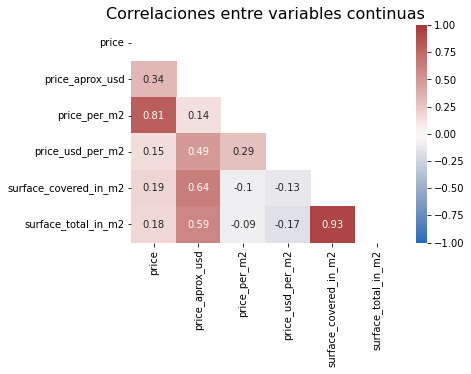

In [418]:
###Calcular matriz de correlaciones
matrix = properatti_data_caba[properatti_data_caba.columns.difference(["lat", "lon", "Comuna","Escalera", "Amenities"])].corr().round(2)
# print(matrix)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title("Correlaciones entre variables continuas", fontsize =16)
plt.show()

In [419]:
properatti_data_caba = properatti_data_caba.reset_index()
properatti_data_caba

,index,property_type,place_name,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Amenities,Escalera,Comuna
0,0,PH,Mataderos,62000.0,62000.0,55.0,40.0,1127.272727,1550.000000,False,False,C9
1,2,apartment,Mataderos,72000.0,72000.0,55.0,55.0,1309.090909,1309.090909,False,False,C9
2,7,apartment,Belgrano,138000.0,138000.0,45.0,40.0,3066.666667,3450.000000,True,False,C13
3,8,apartment,Belgrano,195000.0,195000.0,65.0,60.0,3000.000000,3250.000000,True,False,C13
4,13,apartment,Palermo,111700.0,111700.0,50.0,30.0,2234.000000,3723.333333,True,False,C14
...,...,...,...,...,...,...,...,...,...,...,...,...
16721,121153,apartment,Barrio Norte,165000.0,165000.0,91.0,65.0,1813.186813,2538.461538,True,False,C2
16722,121157,apartment,Belgrano,128000.0,128000.0,38.0,35.0,3368.421053,3657.142857,True,False,C13
16723,121158,apartment,Recoleta,165000.0,165000.0,44.0,39.0,3750.000000,4230.769231,True,False,C2
16724,121215,apartment,Belgrano,870000.0,870000.0,113.0,93.0,7699.115044,9354.838710,True,False,C13


# Preparacion del dataset para entrenamiento

### Estandarización features numericas

In [420]:
numericals = ['surface_covered_in_m2']

X = properatti_data_caba[numericals]

scaler = MinMaxScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

,surface_covered_in_m2_std
0,0.044084
1,0.078886
2,0.044084
3,0.090487
4,0.020882
...,...
16721,0.102088
16722,0.032483
16723,0.041763
16724,0.167053


### Dummies de Comunas

In [438]:
properatti_data_caba['Amenities'] = properatti_data_caba['Amenities'].astype(int)
properatti_data_caba['Escalera'] = properatti_data_caba['Escalera'].astype(int)
properatti_data_caba

,index,property_type,place_name,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Amenities,Escalera,Comuna
0,0,PH,Mataderos,62000.0,62000.0,55.0,40.0,1127.272727,1550.000000,0,0,C9
1,2,apartment,Mataderos,72000.0,72000.0,55.0,55.0,1309.090909,1309.090909,0,0,C9
2,7,apartment,Belgrano,138000.0,138000.0,45.0,40.0,3066.666667,3450.000000,1,0,C13
3,8,apartment,Belgrano,195000.0,195000.0,65.0,60.0,3000.000000,3250.000000,1,0,C13
4,13,apartment,Palermo,111700.0,111700.0,50.0,30.0,2234.000000,3723.333333,1,0,C14
...,...,...,...,...,...,...,...,...,...,...,...,...
16721,121153,apartment,Barrio Norte,165000.0,165000.0,91.0,65.0,1813.186813,2538.461538,1,0,C2
16722,121157,apartment,Belgrano,128000.0,128000.0,38.0,35.0,3368.421053,3657.142857,1,0,C13
16723,121158,apartment,Recoleta,165000.0,165000.0,44.0,39.0,3750.000000,4230.769231,1,0,C2
16724,121215,apartment,Belgrano,870000.0,870000.0,113.0,93.0,7699.115044,9354.838710,1,0,C13


In [439]:
categoricals = ['Comuna', 'property_type']

enc = OneHotEncoder(drop='first')
X = properatti_data_caba[categoricals]
enc.fit(X)
enc.categories_

[array(['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C2', 'C3', 'C4',
        'C5', 'C6', 'C7', 'C8', 'C9'], dtype=object),
 array(['PH', 'apartment', 'house', 'store'], dtype=object)]

In [440]:
dummies = enc.transform(X).toarray()
dummies

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [441]:
dummies.shape

(16726, 17)

In [442]:
dummies_df = pd.DataFrame(dummies)
dummies_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [443]:
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]

col_names

[array(['Comuna_C1', 'Comuna_C10', 'Comuna_C11', 'Comuna_C12',
        'Comuna_C13', 'Comuna_C14', 'Comuna_C15', 'Comuna_C2', 'Comuna_C3',
        'Comuna_C4', 'Comuna_C5', 'Comuna_C6', 'Comuna_C7', 'Comuna_C8',
        'Comuna_C9'], dtype=object),
 array(['property_type_PH', 'property_type_apartment',
        'property_type_house', 'property_type_store'], dtype=object)]

In [444]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

['Comuna_C10',
 'Comuna_C11',
 'Comuna_C12',
 'Comuna_C13',
 'Comuna_C14',
 'Comuna_C15',
 'Comuna_C2',
 'Comuna_C3',
 'Comuna_C4',
 'Comuna_C5',
 'Comuna_C6',
 'Comuna_C7',
 'Comuna_C8',
 'Comuna_C9',
 'property_type_apartment',
 'property_type_house',
 'property_type_store']

In [445]:
dummies_df.columns = col_names_drop_first
dummies_df

,Comuna_C10,Comuna_C11,Comuna_C12,Comuna_C13,Comuna_C14,Comuna_C15,Comuna_C2,Comuna_C3,Comuna_C4,Comuna_C5,Comuna_C6,Comuna_C7,Comuna_C8,Comuna_C9,property_type_apartment,property_type_house,property_type_store
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [446]:

df_dummy_comunas = pd.concat([dummies_df, std_df, properatti_data_caba['Amenities'], properatti_data_caba['Escalera'] ], axis = 1)
#df_dummy_comunas = df_dummy_comunas.drop(['index', 'property_type','place_name','Comuna','price','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_per_m2'], axis=1)
df_dummy_comunas

,Comuna_C10,Comuna_C11,Comuna_C12,Comuna_C13,Comuna_C14,Comuna_C15,Comuna_C2,Comuna_C3,Comuna_C4,Comuna_C5,Comuna_C6,Comuna_C7,Comuna_C8,Comuna_C9,property_type_apartment,property_type_house,property_type_store,surface_covered_in_m2_std,Amenities,Escalera
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.044084,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.078886,0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.044084,1,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.090487,1,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.020882,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.102088,1,0
16722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.032483,1,0
16723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.041763,1,0
16724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.167053,1,0


### Dummies de Barrios

In [447]:
categoricals = ['place_name', 'property_type']

enc = OneHotEncoder(drop='first')
X = properatti_data_caba[categoricals]
enc.fit(X)
enc.categories_

[array(['Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
        'Barrio Norte', 'Belgrano', 'Boedo', 'Caballito',
        'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales',
        'Congreso', 'Constitución', 'Flores', 'Floresta', 'La Boca',
        'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro', 'Nuñez',
        'Once', 'Palermo', 'Parque Avellaneda', 'Parque Centenario',
        'Parque Chacabuco', 'Parque Chas', 'Parque Patricios', 'Paternal',
        'Pompeya', 'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra',
        'San Cristobal', 'San Nicolás', 'San Telmo', 'Tribunales',
        'Velez Sarsfield', 'Versalles', 'Villa Crespo', 'Villa Devoto',
        'Villa General Mitre', 'Villa Lugano', 'Villa Luro',
        'Villa Ortuzar', 'Villa Pueyrredón', 'Villa Real',
        'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati',
        'Villa Urquiza', 'Villa del Parque'], dtype=object),
 array(['PH', 'apartment', 'house', 'store'], dtype=object)]

In [448]:
dummies = enc.transform(X).toarray()
dummies

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [449]:
dummies.shape

(16726, 57)

In [450]:
dummies_df = pd.DataFrame(dummies)
dummies_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16722,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16724,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [451]:
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]

col_names

[array(['place_name_Abasto', 'place_name_Agronomía', 'place_name_Almagro',
        'place_name_Balvanera', 'place_name_Barracas',
        'place_name_Barrio Norte', 'place_name_Belgrano',
        'place_name_Boedo', 'place_name_Caballito',
        'place_name_Centro / Microcentro', 'place_name_Chacarita',
        'place_name_Coghlan', 'place_name_Colegiales',
        'place_name_Congreso', 'place_name_Constitución',
        'place_name_Flores', 'place_name_Floresta', 'place_name_La Boca',
        'place_name_Liniers', 'place_name_Mataderos',
        'place_name_Monserrat', 'place_name_Monte Castro',
        'place_name_Nuñez', 'place_name_Once', 'place_name_Palermo',
        'place_name_Parque Avellaneda', 'place_name_Parque Centenario',
        'place_name_Parque Chacabuco', 'place_name_Parque Chas',
        'place_name_Parque Patricios', 'place_name_Paternal',
        'place_name_Pompeya', 'place_name_Puerto Madero',
        'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saa

In [452]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

['place_name_Agronomía',
 'place_name_Almagro',
 'place_name_Balvanera',
 'place_name_Barracas',
 'place_name_Barrio Norte',
 'place_name_Belgrano',
 'place_name_Boedo',
 'place_name_Caballito',
 'place_name_Centro / Microcentro',
 'place_name_Chacarita',
 'place_name_Coghlan',
 'place_name_Colegiales',
 'place_name_Congreso',
 'place_name_Constitución',
 'place_name_Flores',
 'place_name_Floresta',
 'place_name_La Boca',
 'place_name_Liniers',
 'place_name_Mataderos',
 'place_name_Monserrat',
 'place_name_Monte Castro',
 'place_name_Nuñez',
 'place_name_Once',
 'place_name_Palermo',
 'place_name_Parque Avellaneda',
 'place_name_Parque Centenario',
 'place_name_Parque Chacabuco',
 'place_name_Parque Chas',
 'place_name_Parque Patricios',
 'place_name_Paternal',
 'place_name_Pompeya',
 'place_name_Puerto Madero',
 'place_name_Recoleta',
 'place_name_Retiro',
 'place_name_Saavedra',
 'place_name_San Cristobal',
 'place_name_San Nicolás',
 'place_name_San Telmo',
 'place_name_Tribunales',

In [453]:
dummies_df.columns = col_names_drop_first
dummies_df

,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boedo,place_name_Caballito,place_name_Centro / Microcentro,place_name_Chacarita,place_name_Coghlan,place_name_Colegiales,place_name_Congreso,place_name_Constitución,place_name_Flores,place_name_Floresta,place_name_La Boca,place_name_Liniers,place_name_Mataderos,place_name_Monserrat,place_name_Monte Castro,place_name_Nuñez,place_name_Once,place_name_Palermo,place_name_Parque Avellaneda,place_name_Parque Centenario,place_name_Parque Chacabuco,place_name_Parque Chas,place_name_Parque Patricios,place_name_Paternal,place_name_Pompeya,place_name_Puerto Madero,place_name_Recoleta,place_name_Retiro,place_name_Saavedra,place_name_San Cristobal,place_name_San Nicolás,place_name_San Telmo,place_name_Tribunales,place_name_Velez Sarsfield,place_name_Versalles,place_name_Villa Crespo,place_name_Villa Devoto,place_name_Villa General Mitre,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,property_type_apartment,property_type_house,property_type_store
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16722,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16724,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [466]:
df_dummy_barrios = pd.concat([dummies_df, std_df , properatti_data_caba['Amenities'], properatti_data_caba['Escalera'] ], axis = 1)
#df_dummy_barrios = df_dummy_barrios.drop(['index', 'property_type','place_name','Comuna','price','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_per_m2'], axis=1)
df_dummy_barrios

,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boedo,place_name_Caballito,place_name_Centro / Microcentro,place_name_Chacarita,place_name_Coghlan,place_name_Colegiales,place_name_Congreso,place_name_Constitución,place_name_Flores,place_name_Floresta,place_name_La Boca,place_name_Liniers,place_name_Mataderos,place_name_Monserrat,place_name_Monte Castro,place_name_Nuñez,place_name_Once,place_name_Palermo,place_name_Parque Avellaneda,place_name_Parque Centenario,place_name_Parque Chacabuco,place_name_Parque Chas,place_name_Parque Patricios,place_name_Paternal,place_name_Pompeya,place_name_Puerto Madero,place_name_Recoleta,place_name_Retiro,place_name_Saavedra,place_name_San Cristobal,place_name_San Nicolás,place_name_San Telmo,place_name_Tribunales,place_name_Velez Sarsfield,place_name_Versalles,place_name_Villa Crespo,place_name_Villa Devoto,place_name_Villa General Mitre,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,property_type_apartment,property_type_house,property_type_store,surface_covered_in_m2_std,Amenities,Escalera
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044084,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.078886,0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.044084,1,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.090487,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.020882,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.102088,1,0
16722,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.032483,1,0
16723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.041763,1,0
16724,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.167053,1,0


# Train test Split

In [467]:
X = df_dummy_comunas
y = properatti_data_caba.price_usd_per_m2

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)

# Modelos


## MODELO 1: REGRESION LINEAL SIMPLE

Tiene sentido hacer esto con la superficie? En base a la matriz de confusion no se explica nada.

In [469]:
properatti_data_caba.head()

,index,property_type,place_name,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Amenities,Escalera,Comuna
0,0,PH,Mataderos,62000.0,62000.0,55.0,40.0,1127.272727,1550.000000,0,0,C9
1,2,apartment,Mataderos,72000.0,72000.0,55.0,55.0,1309.090909,1309.090909,0,0,C9
2,7,apartment,Belgrano,138000.0,138000.0,45.0,40.0,3066.666667,3450.000000,1,0,C13
3,8,apartment,Belgrano,195000.0,195000.0,65.0,60.0,3000.000000,3250.000000,1,0,C13
4,13,apartment,Palermo,111700.0,111700.0,50.0,30.0,2234.000000,3723.333333,1,0,C14


## MODELO 2: REGRESION LINEAL MULTIPLE (Comuna)

In [470]:
X = df_dummy_comunas
y = properatti_data_caba.price_usd_per_m2

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)

In [472]:
# Tenemos que agregar explícitamente a una constante:
X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_usd_per_m2   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     118.5
Date:                Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:11:51   Log-Likelihood:            -1.1068e+05
No. Observations:               11708   AIC:                         2.214e+05
Df Residuals:                   11687   BIC:                         2.216e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1946.2055    160.427     12.131      0.000    1631.741    2260.670
Comuna_C10                 -885.7448    185.919     -4.764      0.000   -1250.177    -521.312
Comuna_C11                 -749.4276    190.679     -3.930      0.000   -1123.191    -375.665
Comuna_C12                 -651.1997    137.353     -4.741      0.000    -920.435    -381.964
Comuna_C13                  -56.7365    120.781     -0.470      0.639    -293.487     180.014
Comuna_C14                  337.4962    119.309      2.829      0.005     103.631     571.362
Comuna_C15                 -521.5656    146.674     -3.556      0.000    -809.071    -234.060
Comuna_C2                   313.6719    128.249      2.446      0.014      62.283     565.060
Comuna_C3                  2321.5097    143.332     16.197      0.000    2040.555    2602.464
Comuna_C4                  -833.9743    181.193     -4.603      0.000   -1189.143    -478.806
Comuna_C5                  3094.2913    137.354     22.528      0.000    2825.055    3363.527
Comuna_C6                  -686.4733    138.156     -4.969      0.000    -957.283    -415.664
Comuna_C7                  -867.0312    163.531     -5.302      0.000   -1187.578    -546.484
Comuna_C8                 -1231.0635    349.252     -3.525      0.000   -1915.655    -546.472
Comuna_C9                  -920.0680    203.201     -4.528      0.000   -1318.376    -521.760
property_type_apartment     599.8760    127.123      4.719      0.000     350.693     849.059
property_type_house         322.7631    183.079      1.763      0.078     -36.102     681.628
property_type_store        1301.2580    197.934      6.574      0.000     913.275    1689.241
surface_covered_in_m2_std -2205.4564    229.298     -9.618      0.000   -2654.919   -1755.994
Amenities                  1131.6132     66.684     16.970      0.000    1000.901    1262.325
Escalera                   -749.9985    119.080     -6.298      0.000    -983.415    -516.582
==============================================================================
Omnibus:                    10214.385   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           357443.396
Skew:                           4.143   Prob(JB):                         0.00
Kurtosis:                      28.769   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MODELO 2: REGRESION LINEAL MULTIPLE (Barrio)

In [473]:
X = df_dummy_barrios
y = properatti_data_caba.price_usd_per_m2

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)

In [475]:
# Tenemos que agregar explícitamente a una constante:
X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_usd_per_m2   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     113.4
Date:                Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:11:51   Log-Likelihood:            -1.0907e+05
No. Observations:               11708   AIC:                         2.183e+05
Df Residuals:                   11647   BIC:                         2.187e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1387.0200    448.034      3.096      0.002     508.798    2265.242
place_name_Agronomía               35.5221    745.542      0.048      0.962   -1425.866    1496.910
place_name_Almagro                251.9186    455.440      0.553      0.580    -640.820    1144.657
place_name_Balvanera             -169.0240    468.219     -0.361      0.718   -1086.811     748.763
place_name_Barracas               -82.0805    476.330     -0.172      0.863   -1015.767     851.606
place_name_Barrio Norte           849.9799    455.068      1.868      0.062     -42.030    1741.990
place_name_Belgrano               837.8388    446.027      1.878      0.060     -36.450    1712.128
place_name_Boedo                 7745.5606    456.396     16.971      0.000    6850.948    8640.173
place_name_Caballito              127.2429    447.881      0.284      0.776    -750.680    1005.165
place_name_Centro / Microcentro   615.1316    506.687      1.214      0.225    -378.060    1608.323
place_name_Chacarita              179.1514    540.858      0.331      0.740    -881.021    1239.324
place_name_Coghlan                169.9792    513.685      0.331      0.741    -836.929    1176.888
place_name_Colegiales             340.8823    489.720      0.696      0.486    -619.052    1300.816
place_name_Congreso               487.8149    501.296      0.973      0.331    -494.810    1470.439
place_name_Constitución          -482.8310    571.391     -0.845      0.398   -1602.853     637.191
place_name_Flores                 -90.8214    455.147     -0.200      0.842    -982.986     801.343
place_name_Floresta              -258.7330    483.036     -0.536      0.592   -1205.565     688.099
place_name_La Boca                141.8475    525.819      0.270      0.787    -888.847    1172.542
place_name_Liniers               -157.3591    508.819     -0.309      0.757   -1154.729     840.011
place_name_Mataderos             -153.1317    482.039     -0.318      0.751   -1098.008     791.745
place_name_Monserrat             -210.0437    483.423     -0.434      0.664   -1157.633     737.546
place_name_Monte Castro           -98.2582    686.596     -0.143      0.886   -1444.101    1247.585
place_name_Nuñez                  644.9297    467.553      1.379      0.168    -271.553    1561.412
place_name_Once                  -168.4966    559.966     -0.301      0.763   -1266.124     929.131
place_name_Palermo               1119.0898    443.475      2.523      0.012     249.805    1988.374
place_name_Parque Avellaneda     -325.8880    772.106     -0.422      0.673   -1839.345    1187.569
place_name_Parque Centenario        4.0335    642.026      0.006      0.995   -1254.445    1262.512
place_name_Parque Chacabuco      -224.1703    578.535     -0.387      0.698   -1358

In [476]:
no_reg_model_params = model.params

In [477]:
sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))


2689.237653915486
2496.152190670705


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

